In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
drive.mount('/content/drive',force_remount=True)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/Train',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset_trafficsignsVN/Test',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 7770 images belonging to 121 classes.
Found 405 images belonging to 121 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(64,64,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(121, activation='softmax'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 121)            │        15,609 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,432,921 (9.28 MB)

 Trainable params: 2,432,921 (9.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Tạo optimizer với learning_rate đúng cú pháp
opt = Adam(learning_rate=0.001)

# Compile mô hình
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(train, batch_size=512, epochs=150, verbose=1, validation_data=test)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
243/243 ━━━━━━━━━━━━━━━━━━━━ 4631s 19s/step - accuracy: 0.0251 - loss: 4.7338 - val_accuracy: 0.2099 - val_loss: 3.2257
Epoch 2/150
243/243 ━━━━━━━━━━━━━━━━━━━━ 251s 973ms/step - accuracy: 0.2329 - loss: 2.9268 - val_accuracy: 0.4988 - val_loss: 1.9218
Epoch 3/150
243/243 ━━━━━━━━━━━━━━━━━━━━ 236s 969ms/step - accuracy: 0.5162 - loss: 1.6197 - val_accuracy: 0.6494 - val_loss: 1.2242
Epoch 4/150
243/243 ━━━━━━━━━━━━━━━━━━━━ 237s 974ms/step - accuracy: 0.7026 - loss: 0.8923 - val_accuracy: 0.7210 - val_loss: 0.9962
Epoch 5/150
243/243 ━━━━━━━━━━━━━━━━━━━━ 260s 963ms/step - accuracy: 0.7612 - loss: 0.6588 - val_accuracy: 0.7481 - val_loss: 0.9033
Epoch 6/150
243/243 ━━━━━━━━━━━━━━━━━━━━ 260s 957ms/step - accuracy: 0.8239 - loss: 0.4806 - val_accuracy: 0.7778 - val_loss: 0.8558
Epoch 7/150
243/243 ━━━━━━━━━━━━━━━━━━━━ 235s 967ms/step - accuracy: 0.8408 - loss: 0.3928 - val_accuracy: 0.7753 - val_loss: 0.7474
Epoch 8/150
243/243 ━━━━━━━━━━━━━━━━━━━━ 235s 966ms/step - accuracy: 0

In [ ]:
model.save('CNN_SignTrafficVN.h5')

Test loss=  0.7559112310409546
Test accuracy=  0.8790123462677002


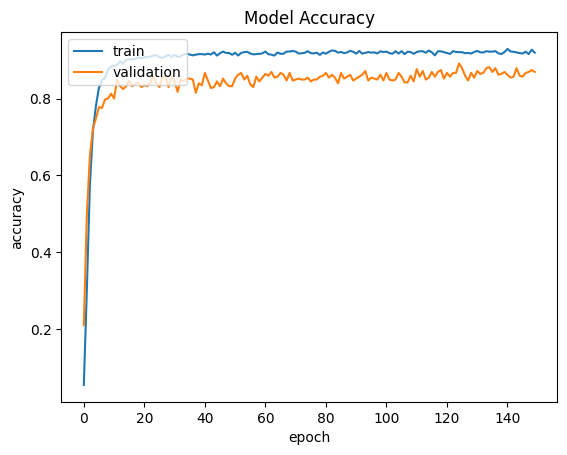

In [ ]:
import matplotlib.pyplot as plt
score = model.evaluate(test,verbose=0)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

In [ ]:

import pandas as pd
clases = pd.read_csv('/content/drive/MyDrive/Dataset_trafficsignsVN/class.csv')
clases = list(clases)
clases

['Duong Cam',
 'Cam Di Nguoc Chieu',
 'Cam O To',
 ' Cam O To Re Phai',
 'Cam O To Re Trai',
 'Cam Xe May',
 'Cam O To Va Xe May',
 'Cam Xe Tai',
 'Cam Xe Tai Tren 2.5 tan',
 ' Cam O To Khach Va O To',
 'Cam O To Ro-Mooc',
 'Cam May Keo',
 'Cam Xe Dap',
 'Cam Xe Dap Tho',
 'Cam Xe 3 va 4 Banh Tho So',
 'Cam Nguoi Di Bo',
 'Cam Xe Keo Day',
 'Cam Xe Suc Vat Keo',
 'Han Che Trong Luong Xe',
 'Han Che Trong Luong Truc Xe',
 'Han Che Chieu Cao Xe',
 'Han Che Chieu Rong Xe',
 'Han Che Chieu Dai O To',
 'Han Che Chieu Dai Ro-Mooc',
 'Khoang Cach Toi Thieu Giua Hai Xe',
 'Dung Lai',
 'Cam Re Trai',
 'Cam Re phai',
 'Cam Quay Dau',
 'Cam O To Quay Dau',
 'Cam Vuot',
 'Cam O To Vuot',
 'Toc Do Toi Da',
 'Cam Bop Coi',
 'Tram Thue Quan',
 'Cam Dung Va Do Xe',
 ' Cam Do Xe',
 'Cam Do Xe Ngay Le',
 ' Cam Do Xe Ngay Chan',
 'Nhuong Duong Cho Xe Co Gioi Di Nguoc Chieu Trong Duong Hep',
 'Het Cam Vuot',
 'Het Han Che Toi Da',
 'Het Tat Ca Cac Lenh Cam',
 'Cam Di Thang',
 'Cam Re Trai Va Phai',
 'Cam 

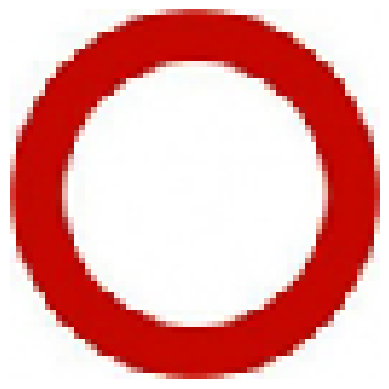

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
Duong Cam


In [ ]:
# Import thư viện
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# Đường dẫn tới ảnh
path_to_image = '/content/drive/MyDrive/Dataset_trafficsignsVN/Test/101/1.png'

# Load ảnh
img = load_img(path_to_image, target_size=(64,64))
plt.imshow(img)
plt.axis('off')  # Ẩn trục
plt.show()

# Chuyển ảnh thành array
img = img_to_array(img)
img = img.reshape(1, 64, 64, 3)  # Reshape về dạng 4D
img = img.astype('float32') / 255  # Normalize

# Dự đoán
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

# In ra kết quả
print(clases[predicted_class])


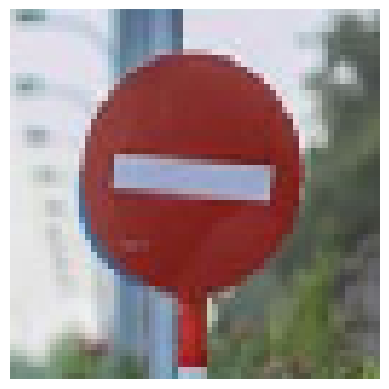

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Cam Di Nguoc Chieu


In [ ]:
# Import thư viện
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# Đường dẫn tới ảnh
path_to_image = '/content/drive/MyDrive/Dataset_trafficsignsVN/Test/102/11.JPG'

# Load ảnh
img = load_img(path_to_image, target_size=(64,64))
plt.imshow(img)
plt.axis('off')  # Ẩn trục
plt.show()

# Chuyển ảnh thành array
img = img_to_array(img)
img = img.reshape(1, 64, 64, 3)  # Reshape về dạng 4D
img = img.astype('float32') / 255  # Normalize

# Dự đoán
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

# In ra kết quả
print(clases[predicted_class])

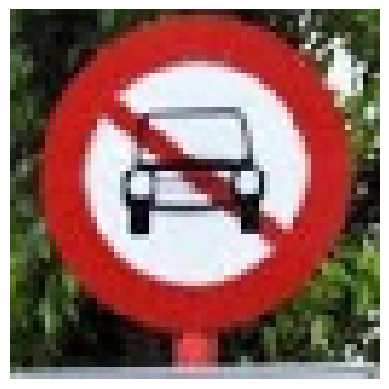

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Cam O To


In [ ]:
# Import thư viện
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# Đường dẫn tới ảnh
path_to_image = '/content/drive/MyDrive/Dataset_trafficsignsVN/Test/103/12.JPG'
# Load ảnh
img = load_img(path_to_image, target_size=(64,64))
plt.imshow(img)
plt.axis('off')  # Ẩn trục
plt.show()

# Chuyển ảnh thành array
img = img_to_array(img)
img = img.reshape(1, 64, 64, 3)
img = img.astype('float32') / 255

# Dự đoán
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

# In ra kết quả
print(clases[predicted_class])

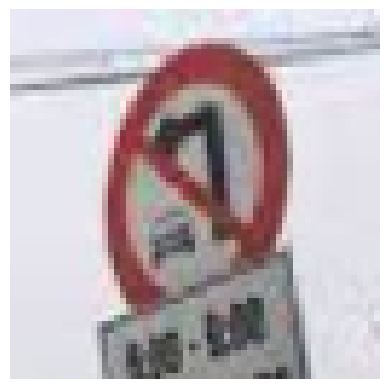

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Cam O To Re Trai


In [ ]:
# Import thư viện
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# Đường dẫn tới ảnh
path_to_image = '/content/drive/MyDrive/Dataset_trafficsignsVN/Test/103c/4.JPG'

# Load ảnh
img = load_img(path_to_image, target_size=(64,64))
plt.imshow(img)
plt.axis('off')  # Ẩn trục
plt.show()

# Chuyển ảnh thành array
img = img_to_array(img)
img = img.reshape(1, 64, 64, 3)
img = img.astype('float32') / 255

# Dự đoán
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

# In ra kết quả
print(clases[predicted_class])

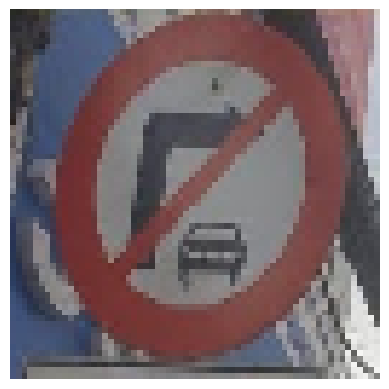

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
 Cam O To Re Phai


In [ ]:
# Import thư viện
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# Đường dẫn tới ảnh
path_to_image = '/content/drive/MyDrive/Dataset_trafficsignsVN/Test/103b/11.JPG'
# Load ảnh
img = load_img(path_to_image, target_size=(64,64))
plt.imshow(img)
plt.axis('off')
plt.show()

# Chuyển ảnh thành array
img = img_to_array(img)
img = img.reshape(1, 64, 64, 3)
img = img.astype('float32') / 255

# Dự đoán
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

# In ra kết quả
print(clases[predicted_class])

In [ ]:
from keras.models import load_model
import pandas as pd
# Load model Nhận diện
model = load_model("/content/drive/MyDrive/Dataset_trafficsignsVN/CNN_SignTrafficVN.h5")
#load nhãn cho model
classes = pd.read_csv('/content/drive/MyDrive/Dataset_trafficsignsVN/class.csv')
classes = list(classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array


In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Giả sử bạn đã load model và class
# model = load_model("path_to_model.h5")
# classes = ["Biển 1", "Biển 2", ..., "Biển 121"]

def predict_object(image):
    # Tiền xử lý ảnh
    image = img_to_array(image)
    image = image.reshape(1, 64, 64, 3)  # Điều chỉnh theo kích thước model yêu cầu

    # Dự đoán
    prediction = model.predict(image)[0]

    # Chuyển sang dictionary: {label: xác suất}
    result = {classes[i]: float(prediction[i]) for i in range(len(classes))}

    return result

# Giao diện Gradio
gr.Interface(
    fn=predict_object,
    inputs=gr.Image(type="numpy", image_mode="RGB"),
    outputs=gr.Label(num_top_classes=3),
    live=False
).launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4ac3860b84684c0732.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2191, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1702, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2191, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1702, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://4ac3860b84684c0732.gradio.live
